In [4]:
import numpy as np
    

In [5]:
def matrice_rank(chemin):
    fichier =open(chemin, "r")
    liste=[]
    dic_user={}
    dic_item={}
    
    for ligne in fichier:
        ligne= ligne.replace("\n","")
        liste1=[]
        
        for j in ligne.split("\t"):
            
            liste1.append(int(j))
            
        liste.append(liste1)
        
    liste =np.array(liste)
    nbr_user=np.max(liste[:,0])
    nbr_item=np.max(liste[:,1])
    mat_rank=np.zeros((nbr_user,nbr_item))
    
    for ligne in liste:
        if ligne[0] not in dic_user.keys():
            dic_it={}
            dic_it[ligne[1]]=ligne[2]
            dic_user[ligne[0]]=dic_it
        else:
            dic_user[ligne[0]][ligne[1]]=ligne[2]
            
        if ligne[1] not in dic_item.keys():
            dic_us={}
            dic_us[ligne[0]]=ligne[2]
            dic_item[ligne[1]]=dic_us
        else:
            dic_item[ligne[1]][ligne[0]]=ligne[2]
            
        #mat_rank[ligne[0]-1][ligne[1]-1]=ligne[2]
    return mat_rank,dic_user,dic_item
        
    
        

In [6]:
rank,b1,c1=matrice_rank("/tmp/FDMS/recodata/u1.train")

In [152]:
c

{1: {1: 5,
  2: 4,
  6: 4,
  13: 3,
  16: 5,
  21: 5,
  25: 5,
  26: 3,
  42: 5,
  44: 4,
  54: 4,
  57: 5,
  58: 5,
  59: 2,
  62: 2,
  63: 3,
  65: 3,
  70: 4,
  72: 4,
  73: 2,
  75: 4,
  77: 5,
  79: 4,
  81: 4,
  82: 4,
  84: 2,
  89: 5,
  92: 4,
  93: 5,
  97: 4,
  99: 4,
  101: 3,
  102: 3,
  108: 4,
  120: 4,
  121: 4,
  124: 3,
  130: 5,
  134: 5,
  137: 3,
  138: 4,
  144: 4,
  151: 5,
  162: 4,
  168: 5,
  174: 3,
  178: 4,
  182: 4,
  184: 4,
  193: 4,
  198: 4,
  199: 1,
  200: 5,
  201: 3,
  202: 3,
  209: 5,
  210: 5,
  216: 4,
  230: 5,
  231: 3,
  235: 4,
  242: 4,
  243: 4,
  244: 4,
  248: 3,
  249: 4,
  251: 4,
  252: 5,
  253: 5,
  254: 3,
  256: 5,
  262: 3,
  263: 5,
  265: 5,
  275: 4,
  276: 5,
  277: 4,
  290: 5,
  291: 5,
  292: 4,
  293: 2,
  294: 5,
  295: 4,
  296: 5,
  297: 3,
  298: 5,
  299: 3,
  303: 5,
  305: 5,
  307: 5,
  312: 5,
  313: 4,
  314: 5,
  324: 5,
  325: 2,
  326: 3,
  327: 4,
  330: 5,
  331: 1,
  332: 4,
  336: 3,
  338: 3,
  343: 5,
 

In [7]:
def matrice_relation(chemin):
    fichier =open(chemin, "r")
    liste=[]
    user=[]
    dic_user={}
    dic_ami={}
    for ligne in fichier:
        ligne= ligne.replace("\n","")
        liste1=[]

        for j in ligne.split("\t"):
            liste1.append(int(j))
        user.append(int( ligne.split("\t")[0]))
        liste.append(liste1)
    user=np.array(user)
    liste2 =np.array(liste)

    
    nbr_user=np.max(user)
    
    mat_rel=np.zeros((nbr_user+1,nbr_user+1))
    
    for ligne in liste:
        
        dic_user[ligne[0]]=ligne[1:-1]
        
        mat_rel[ligne[0]][ligne[1:-1]]=1
        for i in ligne[1:-1]:
            
            if not i in dic_ami.keys():
                
                dic_ami[i]=[]
                dic_ami[i].append(ligne[0])
                
            else:
                dic_ami[i].append(ligne[0])
        
    return np.delete(mat_rel,0,0),dic_user,dic_ami

In [9]:
links,b2,c2=matrice_relation("/tmp/FDMS/recodata/u.links")


In [10]:
rank.shape

(943, 1682)

In [48]:
def cout(rank,links,mat_user,mat_item,mat_amis):
    cout1=0
    for i in rank.keys():
        for j in rank[i].keys():
                cout1+= (rank[i][j]-np.dot(mat_user[i-1].T,mat_item[j-1]))**2
        if i in links.keys():
            for h in links[i]:
                     
                    cout1+= (1-np.dot(mat_user[i-1].T,mat_amis[h-1]))**2
    return cout1
    

In [84]:

def grad(rank,rank1,links,links1,d,nb_iter,eps,):
    
    mat_user=np.random.rand(np.max(rank.keys()),d)
    mat_item=np.random.rand(np.max(rank1.keys()),d)
    mat_amis=np.random.rand(np.max(links.keys()),d)
    
    liste_cout=[]
    for h in range(10):
        for i in range(nb_iter):
            r=np.random.randint(1,np.max(rank.keys()))
            while r not in rank.keys():
                r=np.random.randint(1,np.max(rank.keys()))
            grad_user=0
            for item in rank[r].keys():
                    grad_user+=(np.dot(mat_user[r-1].T,mat_item[item-1])-rank[r][item])*mat_item[item-1]
            if r in links.keys():
                for ami in links[r]:

                            grad_user+=(np.dot(mat_user[r-1].T,mat_amis[ami-1])-1)*mat_amis[ami-1]
                mat_user[r-1]=mat_user[r-1]-eps*grad_user
            liste_cout.append(cout(rank,links,mat_user,mat_item,mat_amis))
        print str(h)  +"1"
        for i in range(nb_iter):
            
            r=np.random.randint(1,np.max(rank1.keys()))
            while r not in rank1.keys():
                r=np.random.randint(1,np.max(rank1.keys()))
            grad_item=0
            for user in rank1[r].keys():

                    grad_item+=(np.dot(mat_user[user-1].T,mat_item[r-1])-rank1[r][user])*mat_user[user-1]

            mat_item[r-1]=mat_item[r-1]-eps*grad_item
            liste_cout.append(cout(rank,links,mat_user,mat_item,mat_amis))
        print str(h)  +"2"
        for i in range(nb_iter):
            
            r=np.random.randint(1,np.max(links1.keys()))
            while r not in links1.keys():
                r=np.random.randint(1,np.max(links1.keys()))
            grad_amis=0

            for user in links1[r]:

                    grad_amis+=(np.dot(mat_user[user-1].T,mat_amis[r-1])-1)*mat_user[user-1]

            mat_amis[r-1]=mat_amis[r-1]-eps*grad_amis
            liste_cout.append(cout(rank,links,mat_user,mat_item,mat_amis))
        print str(h) +"3"
    
    return liste_cout
    
  

In [85]:
liste=grad(b1,c1,b2,c2,10,100,0.001)

01
02
03
11
12
13
21
22
23
31
32
33
41
42
43
51
52
53
61
62
63
71
72
73
81
82
83
91
92
93


In [18]:
print len(b1.keys())
print len(c1.keys())
print len(b2.keys())
print len(c2.keys())

943
1650
934
931


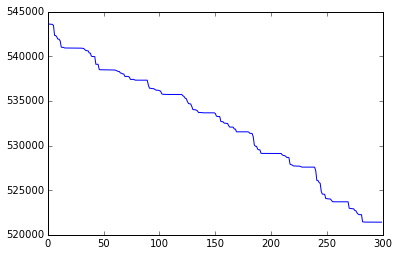

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range (len(liste)), liste)    #X, Y
plt.show()

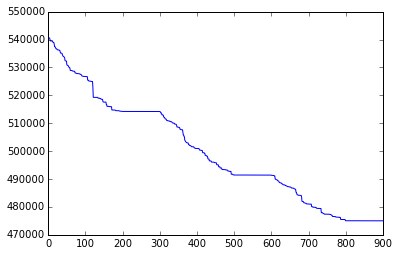

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range (len(liste)), liste)    #X, Y
plt.show()

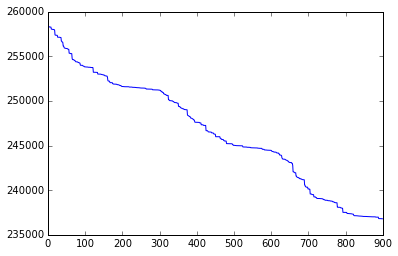

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range (len(liste)), liste)    #X, Y
plt.show()

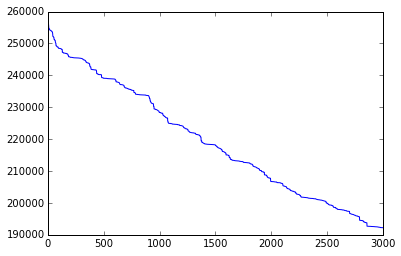

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range (len(liste)), liste)    #X, Y
plt.show()